Training Random Forest...
Random Forest Accuracy (n_trees=100): 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       592
           1       0.93      0.90      0.91       593

    accuracy                           0.91      1185
   macro avg       0.92      0.91      0.91      1185
weighted avg       0.92      0.91      0.91      1185



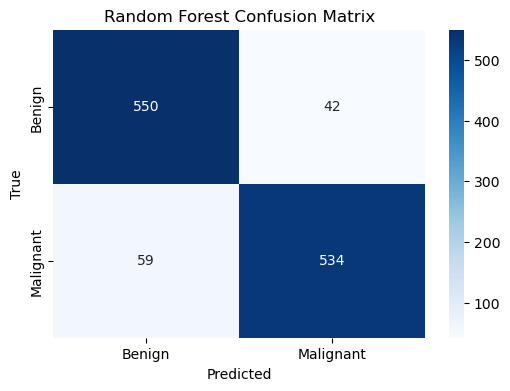

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load images and labels from a folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img_array = np.array(img).flatten()  # Flatten the image
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load images from both folders
benign_folder_path = 'Benign'  # Replace with your Benign folder path
malignant_folder_path = 'Malignant'  # Replace with your Malignant folder path

benign_images, benign_labels = load_images_from_folder(benign_folder_path, 0)  # Label 0 for Benign
malignant_images, malignant_labels = load_images_from_folder(malignant_folder_path, 1)  # Label 1 for Malignant

# Combine the data
X = np.array(benign_images + malignant_images)
y = np.array(benign_labels + malignant_labels)

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
n_trees = 100  # Number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (n_trees={n_trees}): {accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()